# Pymaceuticals Inc.
---

### Analysis

The top 4 drug regiments, Infubibnol was the only drug regiment shown to have an outlier which lies outside the lower bound.

The Capomulin drug was highly effective in reducing the Tumor Volume of the s185 mouse. According to my line plot below the drug was able to reduce the tumor volume by at least 50%.

As the weight of the mouse increases, the tumor volume increases. This shows that there is a positive correlation between the weight and the tumor volume of the mice. The Pearson correlation coefficient of .84 shows that there is a high degree of correlation between these two varilables.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how = "outer", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stat = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": var,
                            "Tumor Volume Std. Dev.": std,
                            "Tumor Volume Std. Err.":sem})
# Assemble the resulting series into a single summary DataFrame.
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

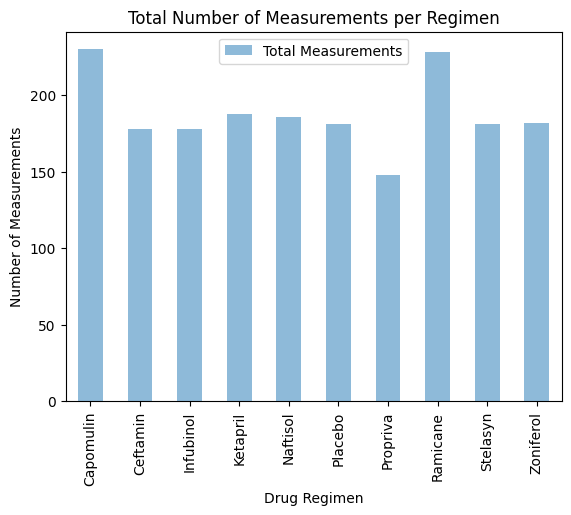

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_group = clean_df.groupby("Drug Regimen").count()
pandas_bar = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})
pandas_bar.plot(kind = "bar", alpha = .50)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")
plt.show()

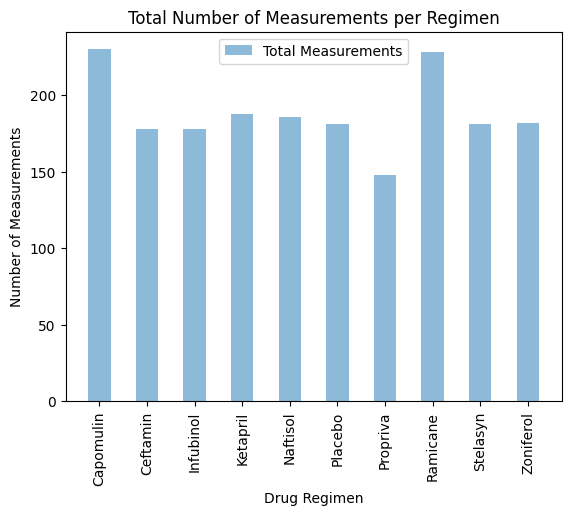

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group))
tick_locations = [x *1.7 for x in x_axis]
plt.bar(tick_locations, pandas_bar["Total Measurements"], alpha = .5, align = "center", label = "Total Measurements")
plt.xticks(tick_locations, regimen_group.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.legend(loc = "best")
plt.show()


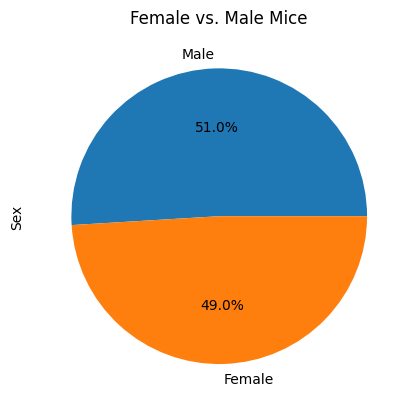

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


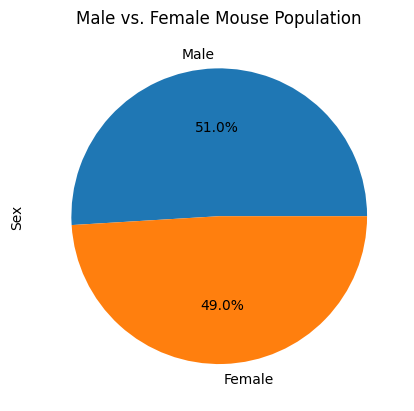

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Female", "Male"]
sizes = [4.7999197, 50.200803]
plot = gender_data.plot.pie(y="Total Count", autopct= "%1.1f%%")
plt.title("Male vs. Female Mouse Population")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
copy_clean = pd.DataFrame.copy(clean_df)
final_four = clean_df.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()

# Start by getting the last (greatest) timepoint for each mouse
final_four = final_four.groupby("Mouse ID")["Timepoint"].max()
final_four = pd.DataFrame(final_four).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(copy_clean, final_four, on = ["Timepoint", "Mouse ID"])
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
lists = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"The lower quartile of Tumor Volume (mm3) is {lowerq}.")
print(f"The upper quartile of Tumor Volume (mm3) is {upperq}.")
print(f"The Interquartile range of Tumor Volume (mm3) is {IQR}.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in merged.iterrows():
        if row["Drug Regimen"] == treatment:
            lists.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(lists)  
    
    # add subset 
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

The lower quartile of Tumor Volume (mm3) is 37.1877438025.
The upper quartile of Tumor Volume (mm3) is 59.930261755.
The Interquartile range of Tumor Volume (mm3) is 22.742517952499995.
Values below 3.0739668737500097 could be outliers
Values above 94.04403868374999 could be outliers


Text(0.5, 1.0, 'Variability of Top 4 Drug Regiments')

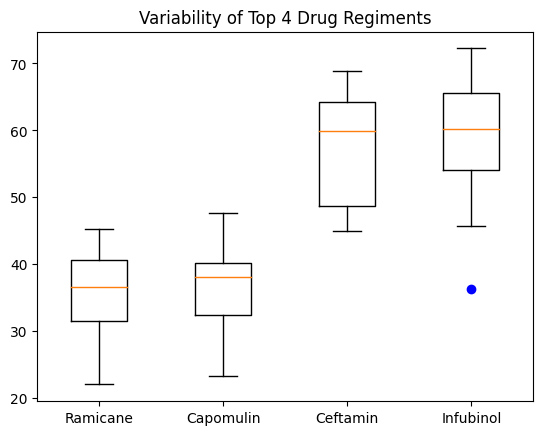

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"]], labels = treatments, sym = "b")
plt.title("Variability of Top 4 Drug Regiments")


## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

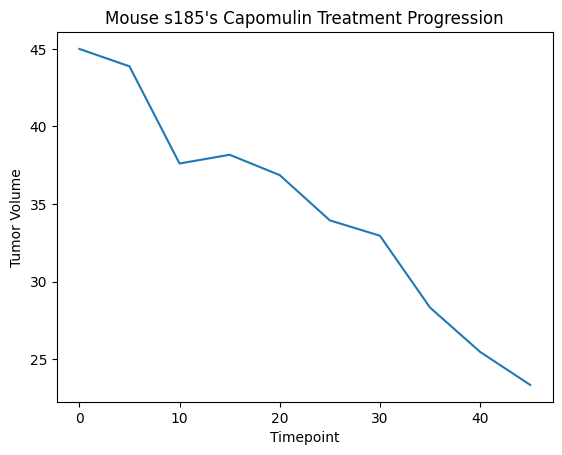

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].loc[clean_df["Mouse ID"] == "s185"]

lx_axis = s185["Timepoint"].tolist()
ly_axis = s185["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185's Capomulin Treatment Progression")
lx_axis


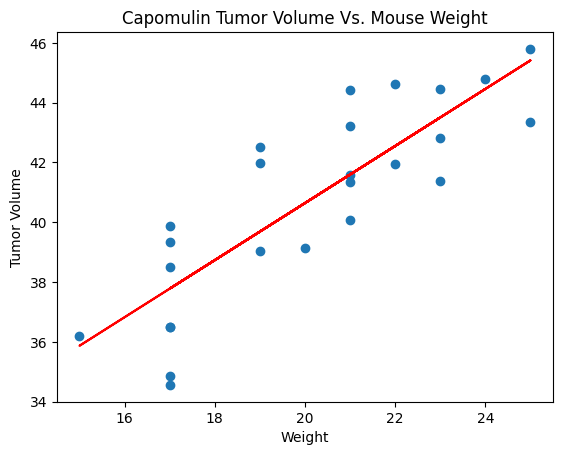

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = Capomulin_weight["Weight (g)"]
sy_axis = Capomulin_weight["Tumor Volume (mm3)"]

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

plt.scatter(sx_axis,sy_axis)
plt.title("Capomulin Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.plot(sx_axis,regress_values, "r-")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"Linear Regressions Model: y = {round(slope, 2)}x + {round(intercept, 2)}")


The correlation between both factors is 0.84
Linear Regressions Model: y = 0.95x + 21.55
